# Contents

### 1. Data Pre-processing and Cleaning
### 2. Distribution of Case Outcomes
### 3. Wordcloud for case text
### 4. Top 20 words across cases
### 5. Average Polarity and Subjectivity Score across case outcome
### 6. Analyse the relationship across the number of words and the case results
### 7. POS Visualization

Importing libraries and the Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import os
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import re
import string
from nltk.stem import WordNetLemmatizer
string.punctuation
from nltk.corpus import stopwords

stop = stopwords.words('english')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from nltk.tokenize import word_tokenize
from nltk import pos_tag
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/legal-citation-text-classification/legal_text_classification.csv


In [2]:
df=pd.read_csv("/kaggle/input/legal-citation-text-classification/legal_text_classification.csv")
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


### 1. Data pre-processing and cleaning

Code Explanation: The text data is being cleaned in the below chunks so that it can be analysed further:
* Removal of punctuations
* Standardizing the text case as lower
* Removal of stop words
* Removing digits from the text

In [3]:
df['case_text']=df['case_text'].astype('str')
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['case_text']= df['case_text'].apply(lambda x:remove_punctuation(x))


#Making the case consistent as lower
df['case_text']= df['case_text'].apply(lambda x: x.lower())
df['case_text']= df['case_text'].str.replace('\d+', '')


#Removing Stop Words
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

df['case_text']=df['case_text']
df['case_text'] = df['case_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":


Code Explanation: Extracting additional features from the cleaned text

* Addition of word length
* Addition of character length
* Addition of text polarity score: The polarity score is a number ranging from -1 to +1 denoting the sentiment behind a particular text, -1 denotes that the text has a very nevative undertone. similarly +1 denotes that the text has a very positive undertone, 0 denotes neutral text
* Addition of text subjectivity score: Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is a float which lies in the range of [0,1], the higher the value the higher the subjectivity score

In [4]:
#Adding features character length, word length and Polarity score for each record
df['Character_length']= df['case_text'].str.len()
df['Word_length']=df['case_text'].str.count(' ') + 1

def sentiment_func(text):
    return TextBlob(text).sentiment[0]

def sub_func(text):
    return TextBlob(text).sentiment[1]
    
df['Polarity_score']=df.case_text.apply(lambda x: sentiment_func(x))
df['Subjectivity_score']=df.case_text.apply(lambda x: sub_func(x))

### 2. Plotting distribution of case outcomes

In [5]:
df_cited_dist=df.groupby(['case_outcome'],as_index=False).agg({'case_id':'count'}).reset_index(drop=True)
fig = make_subplots(rows=1, cols=1,specs=[[{"type": "pie"}]])
fig.add_trace(go.Pie(labels=df_cited_dist['case_outcome'], values=df_cited_dist['case_id'], hole=.5),1,1)
fig.update_layout(
    title={'text': "Distribution of Case Outcomes",'x':0.5,'xanchor': 'center','yanchor': 'top'}
    )
fig.show()

### 3. Wordcloud for case text

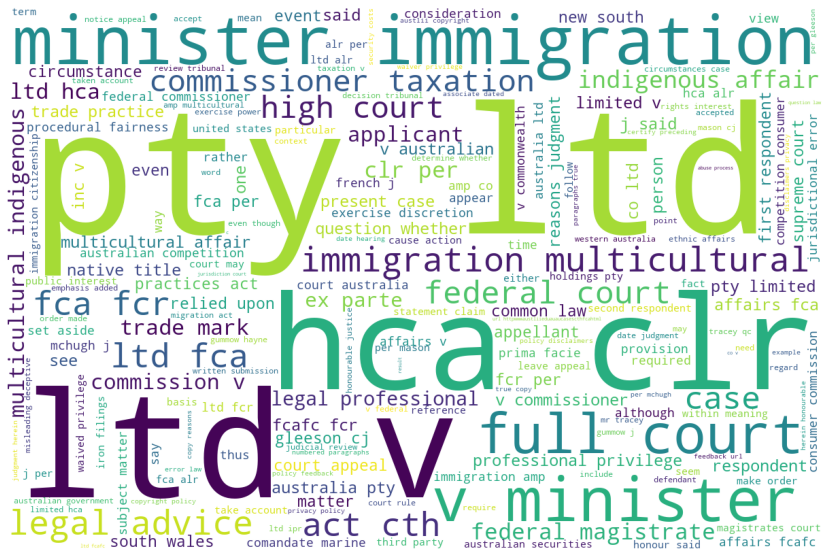

In [6]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)


Cloud_text = ' '.join(df['case_text'])
wordcloud2 = WordCloud( background_color = 'white',width=1200, height=800).generate(Cloud_text)
# Generate plot

plt.imshow(wordcloud2)
plt.axis("off")

plt.show()

### 4. Top 20 Words Across Cases

In [7]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['case_text'], 20)


    
df_unigram_20 = pd.DataFrame(common_words, columns = ['Word' , 'count']).sort_values(by="count",ascending=False).reset_index(drop=True)

fig = px.bar(df_unigram_20, x='Word', y='count')
fig.update_layout(
    title={
        'text': "Top 20 words across all cases",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### 5. Average Polarity and Subjectivity Score across citation

In [8]:
data_polarity=df.groupby(['case_outcome'],as_index=False).agg({'Polarity_score':'mean'}).rename(columns={'Polarity_score': 'Polarity_score'}).sort_values(by='Polarity_score',ascending=False).reset_index(drop=True)
fig = px.bar(data_polarity, x="case_outcome",y="Polarity_score",
             barmode='group',
             height=450)
fig.update_traces(textposition='outside')
fig.update_layout(width=800,height=400,
    title={
        'text': "Average Polarity Score across case outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [9]:
data_polarity=df.groupby(['case_outcome'],as_index=False).agg({'Subjectivity_score':'mean'}).rename(columns={'Subjectivity_score': 'Subjectivity_score'}).sort_values(by='Subjectivity_score').reset_index(drop=True)

fig = px.bar(data_polarity, x="case_outcome",y="Subjectivity_score",
             height=450)
fig.update_traces(textposition='outside')
fig.update_layout(width=800,height=400,
    title={
        'text': "Average Subjectivity Score across case outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

 ### 6. Analyse the relationship across number of words and the case results

In [10]:
df_word=df.groupby(['case_outcome'],as_index=False).agg({'Word_length':'mean'}).rename(columns={'Word_length': 'Average Word Length'}).sort_values(by='Average Word Length',ascending=False).reset_index(drop=True)
fig = px.bar(df_word, x="case_outcome",y="Average Word Length",color='case_outcome',
             height=450)
fig.update_traces(textposition='outside')
fig.update_layout(width=800,height=600,
    title={
        'text': "Average number of words across case outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


### 7.POS Visualization

In [11]:
df=df.head(1000)

In [12]:
def NounCount(x):
    nounCount = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN'))
    return nounCount

def prepositioncount(x):
    pc = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('IN'))
    return pc

def adjectivecount(x):
    ad = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ'))
    return ad

def adverbcount(x):
    ab = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('RB'))
    return ab

def interjectioncount(x):
    ij = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('UH'))
    return ij

def verbcount(x):
    v = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB'))
    return v



df["noun_count"] = df["case_text"].apply(NounCount)
df["preposition_count"] = df["case_text"].apply(prepositioncount)
df["adjective_count"] = df["case_text"].apply(adjectivecount)
df["adverb_count"] = df["case_text"].apply(adverbcount)
df["interjection_count"] = df["case_text"].apply(interjectioncount)
df["verb_count"] = df["case_text"].apply(verbcount)

In [13]:
df_pos_tagged_ap=df
df_pos_tagged_ap=df_pos_tagged_ap.groupby(['case_outcome'],as_index=False).agg({'noun_count':'sum',
                                                                                'preposition_count':'sum',
                                                                                'adjective_count':'sum',
                                                                                'adverb_count':'sum',
                                                                                'interjection_count':'sum',
                                                                               'verb_count':'sum' }).reset_index(drop=True)
df_pos_tagged_ap                                                     

,case_outcome,noun_count,preposition_count,adjective_count,adverb_count,interjection_count,verb_count
0,affirmed,226,5,74,8,0,86
1,applied,8268,359,2827,704,0,3035
2,cited,35820,1401,12665,2525,1,12255
3,considered,8875,349,3077,709,0,3295
4,discussed,8042,305,2807,603,0,2908
5,distinguished,3567,138,1171,288,0,1407
6,followed,13247,699,4294,1003,0,5005
7,referred to,11344,522,4002,887,0,4349
8,related,424,3,156,26,0,172


In [14]:
df_pos_tagged_ap_t=df_pos_tagged_ap.transpose()
df_pos_tagged_ap_t["POS"]=df_pos_tagged_ap_t.index
df_pos_tagged_ap_t
df_pos_tagged_ap_t.columns=["affirmed","applied","cited","considered","discussed","distinguished","followed",
                            "referred to","related","POS"]
df_pos_tagged_ap_t=df_pos_tagged_ap_t[df_pos_tagged_ap_t["affirmed"]!='affirmed'].reset_index(drop=True)
df_pos_tagged_ap_t
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["affirmed"],
                    mode='lines+markers',
                    name='affirmed'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["applied"],
                    mode='lines+markers',
                    name='applied'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["cited"],
                    mode='lines+markers',
                    name='cited'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["considered"],
                    mode='lines+markers',
                    name='considered'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["discussed"],
                    mode='lines+markers',
                    name='discussed'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["distinguished"],
                    mode='lines+markers',
                    name='distinguished'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["followed"],
                    mode='lines+markers',
                    name='followed'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["referred to"],
                    mode='lines+markers',
                    name='referred to'))
fig.add_trace(go.Scatter(x=df_pos_tagged_ap_t["POS"], y=df_pos_tagged_ap_t["related"],
                    mode='lines+markers',
                    name='related'))


fig.update_layout(
    title={
        'text': "Distribution of Parts of Speech Across Case Outcomes",
        'x':0.5,
        'xanchor': 'center',
         'yanchor': 'top'})

fig.show()  